# GRU TRAINING

In [4]:
import pandas as pd
import numpy as np
import random
from dataset import label_detection_training, label_detection_validation, label_detection_full
from models import Lstm, Gru, Transformer

In [4]:
import random

results = pd.DataFrame(columns=['gru_units', 'dropout_rate', 'epoch', 'batch', 'learning_rate', 'loss', 'loss_max', 'accuracy', 'accuracy_max', 'val_loss', 'val_loss_max', 'val_accuracy', 'val_accuracy_max'])

# Define hyperparameters to search over
hyperparameters = {
    'gru_units': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'epoch': [10, 15, 20, 25],
    'batch_size': [16, 32, 64, 128],
    'learning_rate': [0.0001, 0.001, 0.01]
}

#number of trials
n_iter = 10
for n in range(n_iter):
    # Randomly sample hyperparameters
    gru_params = {param: random.choice(values) for param, values in hyperparameters.items()}
    print(gru_params)

    # Create an instance of the Gru class with the randomly sampled hyperparameters
    gru = Gru(**gru_params, num_classes=11)

    # Train the model on your training dataset
    gru.train(label_detection_training, label_detection_validation)
    results = np.concatenate((results, pd.DataFrame([[gru_params['gru_units'], gru_params['dropout_rate'], gru_params['epoch'], gru_params['batch_size'], gru_params['learning_rate'], gru.history.history['loss'][-1], gru.history.history['loss'], gru.history.history['accuracy'][-1], gru.history.history['accuracy'], gru.history.history['val_loss'][-1], gru.history.history['val_loss'], gru.history.history['val_accuracy'][-1], gru.history.history['val_accuracy']]], 
                                                                        columns=['gru_units', 'dropout_rate', 'epoch', 'batch', 'learning_rate', 'loss', 'loss_max', 'accuracy', 'accuracy_max', 'val_loss', 'val_loss_max', 'val_accuracy', 'val_accuracy_max'])), axis=0)

    



{'gru_units': 128, 'dropout_rate': 0.5, 'epoch': 10, 'batch_size': 16, 'learning_rate': 0.001}
Epoch 1/10
3621/3621 [==============================] - ETA: 0s - loss: 1.6871 - accuracy: 0.5971
Epoch 1: val_accuracy improved from -inf to 0.62092, saving model to models\gru.h5
3621/3621 [==============================] - 560s 144ms/step - loss: 1.6871 - accuracy: 0.5971 - val_loss: 1.6012 - val_accuracy: 0.6209
Epoch 2/10
3621/3621 [==============================] - ETA: 0s - loss: 1.4139 - accuracy: 0.6348
Epoch 2: val_accuracy did not improve from 0.62092
3621/3621 [==============================] - 754s 208ms/step - loss: 1.4139 - accuracy: 0.6348 - val_loss: 1.4988 - val_accuracy: 0.6209
Epoch 3/10
3621/3621 [==============================] - ETA: 0s - loss: 1.1325 - accuracy: 0.6521
Epoch 3: val_accuracy did not improve from 0.62092
3621/3621 [==============================] - 929s 256ms/step - loss: 1.1325 - accuracy: 0.6521 - val_loss: 1.5996 - val_accuracy: 0.6037
Epoch 4/10
3621

KeyboardInterrupt: 

In [ ]:
results = pd.DataFrame(results)
results

In [5]:
gru_params = {'gru_units': 64, 'dropout_rate': 0.1, 'epoch': 10, 'batch_size': 32, 'learning_rate': 0.001}
gru = Gru(**gru_params, num_classes=11, model_path='models\\xx.h5')
gru.train(label_detection_training, label_detection_validation)

Epoch 1/10
1811/1811 [==============================] - ETA: 0s - loss: 1.1161 - accuracy: 0.6665
Epoch 1: val_accuracy improved from -inf to 0.78464, saving model to models\xx.h5
1811/1811 [==============================] - 258s 117ms/step - loss: 1.1161 - accuracy: 0.6665 - val_loss: 0.6961 - val_accuracy: 0.7846
Epoch 2/10
1811/1811 [==============================] - ETA: 0s - loss: 0.6661 - accuracy: 0.7931
Epoch 2: val_accuracy improved from 0.78464 to 0.82333, saving model to models\xx.h5
1811/1811 [==============================] - 162s 89ms/step - loss: 0.6661 - accuracy: 0.7931 - val_loss: 0.5883 - val_accuracy: 0.8233
Epoch 3/10
1811/1811 [==============================] - ETA: 0s - loss: 0.5556 - accuracy: 0.8300
Epoch 3: val_accuracy improved from 0.82333 to 0.83304, saving model to models\xx.h5
1811/1811 [==============================] - 160s 88ms/step - loss: 0.5556 - accuracy: 0.8300 - val_loss: 0.5463 - val_accuracy: 0.8330
Epoch 4/10
1810/1811 [=======================

# Best GRU result

In [1]:
import matplotlib.pyplot as plt

In [6]:
print(gru.history.history['loss'])
print(gru.history.history['val_loss'])
print(gru.history.history['accuracy'])
print(gru.history.history['val_accuracy'])

[1.1160730123519897, 0.6660863757133484, 0.555563747882843, 0.49678608775138855, 0.44850394129753113, 0.41253533959388733, 0.38366058468818665, 0.36045175790786743, 0.3405363857746124, 0.3276956379413605]
[0.6961086988449097, 0.5882535576820374, 0.5462737083435059, 0.45062294602394104, 0.432292103767395, 0.4684085249900818, 0.40765848755836487, 0.39137306809425354, 0.3966062664985657, 0.40114566683769226]
[0.666471004486084, 0.793121874332428, 0.8299812078475952, 0.8482468128204346, 0.8652694225311279, 0.8771472573280334, 0.8845536112785339, 0.8917873501777649, 0.8967077136039734, 0.901645302772522]
[0.7846425175666809, 0.8233304023742676, 0.8330391049385071, 0.8679023385047913, 0.8712856769561768, 0.8553986549377441, 0.8767284750938416, 0.8820241093635559, 0.8783465623855591, 0.8837893605232239]


## Loss

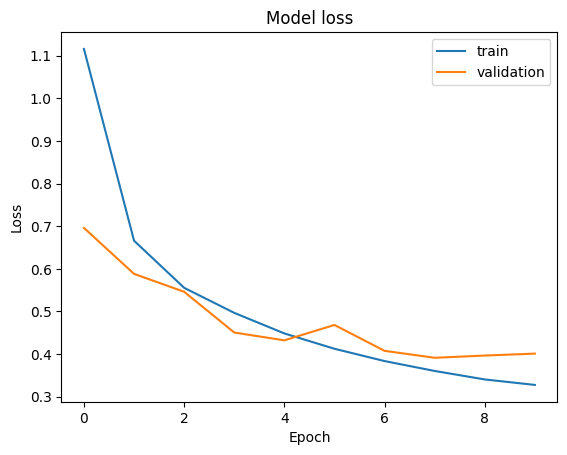

In [7]:
plt.plot(gru.history.history['loss'], label='train')
plt.plot(gru.history.history['val_loss'], label='validation')
plt.legend()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Accuracy

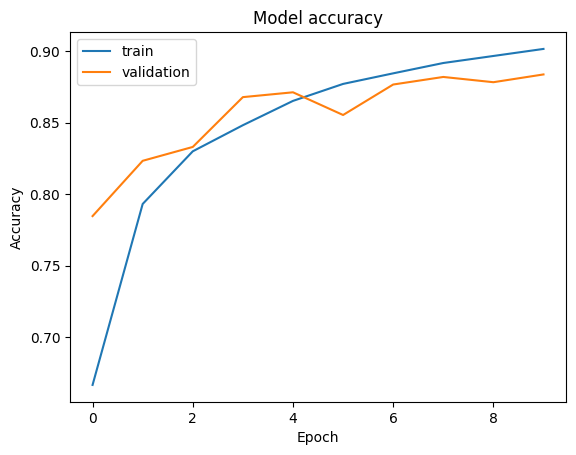

In [8]:
plt.plot(gru.history.history['accuracy'], label='train')
plt.plot(gru.history.history['val_accuracy'], label='validation')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()